In [1]:
import sympy
sympy.init_printing()

(u_max, u_star, rho_max, 
 rho_star, A, B) = sympy.symbols('u_max u_star rho_max rho_star A B')

In [2]:
eq1 = sympy.Eq( 0, u_max*rho_max*(1 - A*rho_max-B*rho_max**2) )
eq2 = sympy.Eq( 0, u_max*(1 - 2*A*rho_star-3*B*rho_star**2) )
eq3 = sympy.Eq( u_star, u_max*(1 - A*rho_star - B*rho_star**2) )

In [3]:
eq1

In [4]:
eq2

In [5]:
eq3

In [6]:
eq2 - 3*eq3

In [8]:
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)
eq4


In [9]:
eq4.simplify()

In [10]:
eq4

In [11]:
eq4.expand()

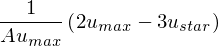

In [12]:
rho_sol = sympy.solve(eq4,rho_star)[0]
rho_sol

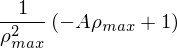

In [13]:
B_sol = sympy.solve(eq1,B)[0]
B_sol

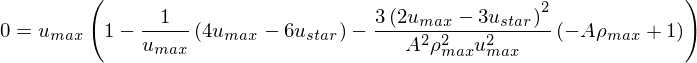

In [14]:
quadA = eq2.subs([(rho_star, rho_sol), (B,B_sol)])
quadA

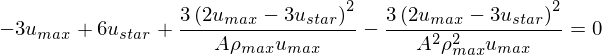

In [15]:
quadA.simplify()

In [16]:
A_sol = sympy.solve(quadA, A)

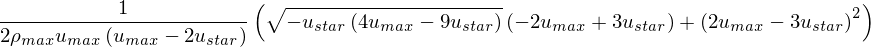

In [18]:
A_sol[0]

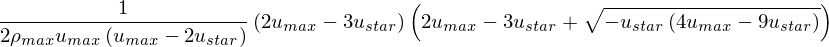

In [19]:
A_sol[1]

In [20]:
aval = A_sol[0].evalf(subs={u_star: 0.7, u_max:1.0, rho_max:10.0} )
aval

In [21]:
A_sol[1].evalf(subs={u_star: 0.7, u_max:1.0, rho_max:10.0} )

In [22]:
bval = B_sol.evalf(subs={rho_max:10.0, A:aval} )
bval

In [23]:
sympy.init_printing(use_latex=False)

In [24]:
print(type(rho_max), type(u_max))

<class 'sympy.core.symbol.Symbol'> <class 'sympy.core.symbol.Symbol'>


In [25]:
rho_max = 10.
u_max = 1.

In [26]:
def computeF(u_max, rho, aval, bval):
    return u_max*rho*(1 - aval*rho-bval*rho**2)

In [27]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [28]:
def rho_green_light(nx, rho_light):
    """Computes "green light" initial condition with shock, and linear distribution behind

    Parameters
    ----------
    nx        : int
        Number of grid points in x
    rho_light : float
        Density of cars at stoplight

    Returns
    -------
    rho_initial: array of floats
        Array with initial values of density
    """    
    rho_initial = numpy.arange(nx)*2./nx*rho_light  # Before stoplight
    rho_initial[int((nx-1)/2):] = 0
    
    return rho_initial

In [29]:
#Basic initial condition parameters
#defining grid size, time steps
nx = 81
nt = 30
dx = 4.0/(nx-1)

x = numpy.linspace(0,4,nx)

rho_light = 5.5

In [30]:
rho_initial = rho_green_light(nx, rho_light)

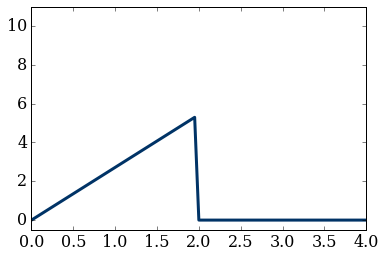

In [31]:
pyplot.plot(x, rho_initial, color='#003366', ls='-', lw=3)
pyplot.ylim(-0.5,11.);

In [32]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho))) 
    
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()              
    
    for t in range(1,nt):
        F = computeF(u_max, rho, aval, bval)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()

    return rho_n

In [33]:
sigma = 1.
dt = sigma*dx/u_max

rho_n = ftbs(rho_initial, nt, dt, dx, rho_max, u_max)

In [34]:
from matplotlib import animation
from IPython.display import HTML

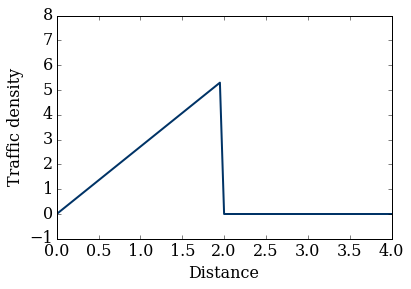

In [35]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-1,8),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)

In [36]:
HTML(anim.to_html5_video())